In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Загрузка данных

In [2]:
import pandas as pd

data_wine = pd.read_csv('winequality-red.csv', sep=';', encoding='latin1')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data_wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Заметим, что все атрибуты, кроме quality имеют тип float и полные данные.

Метод describe() отображает сводку по числовым  атрибутам.

In [5]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Постоим гистограммы числовых атрибутов.

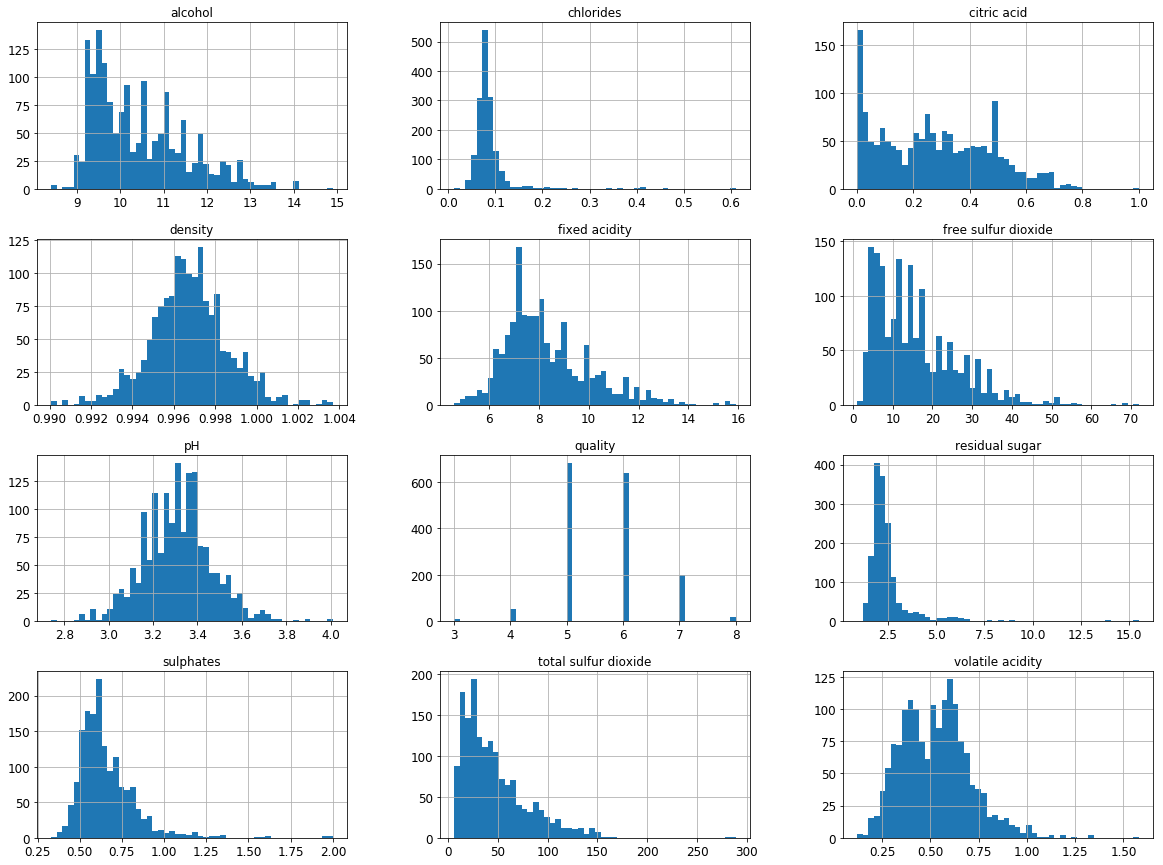

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data_wine.hist(bins=50, figsize=(20,15))

plt.show()

# Создание испытательного набора

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_wine, test_size=0.2, random_state=42)

In [8]:
print(len(train_set), "train +", len(test_set), "test")

1279 train + 320 test


In [9]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


Предположим, что атрибут density является важным атрибутом для прогнозирования quality. Постороим стратифицированную выборку на основе категории возраста 

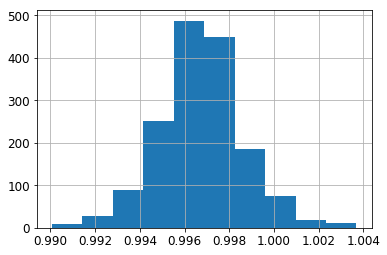

In [10]:
data_wine["density"].hist()

In [11]:
# Divide by 1.5 to limit the number of density categories
data_wine["density_cat"] = np.ceil(data_wine["density"] / 1.5)
# Label those above 12 as 12
data_wine["density_cat"].where(data_wine["density_cat"] < 12, 12.0, inplace=True)

In [12]:
data_wine["density_cat"] = pd.cut(data_wine["density"],
                               bins=[0.99, 0.994, 0.998, 1.002, 1.006, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [13]:
data_wine["density_cat"].value_counts()

2    1144
3     327
1     113
4      15
5       0
Name: density_cat, dtype: int64

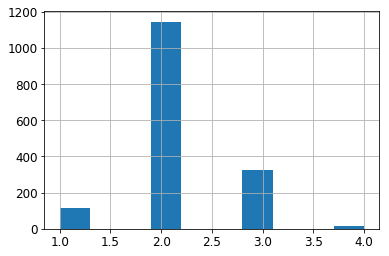

In [14]:
data_wine["density_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_wine, data_wine["density_cat"]):
    strat_train_set = data_wine.loc[train_index]
    strat_test_set = data_wine.loc[test_index]

In [16]:
strat_test_set["density_cat"].value_counts() / len(strat_test_set)

2    0.715625
3    0.203125
1    0.071875
4    0.009375
5    0.000000
Name: density_cat, dtype: float64

In [17]:
data_wine["density_cat"].value_counts() / len(data_wine)

2    0.715447
3    0.204503
1    0.070669
4    0.009381
5    0.000000
Name: density_cat, dtype: float64

In [18]:
def density_proportions(data):
    return data["density_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data_wine, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": density_proportions(data_wine),
    "Stratified": density_proportions(strat_test_set),
    "Random": density_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [19]:
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1,0.070669,0.090625,0.071875,28.238385,1.706305
2,0.715447,0.693750,0.715625,-3.032670,0.024858
3,0.204503,0.209375,0.203125,2.382454,-0.673739
4,0.009381,0.006250,0.009375,-33.375000,-0.062500
5,0.000000,0.000000,0.000000,NaN,NaN


Сравнивая пропорции возраста в полном объеме данных, в испытательном наборе, который сгенерирован посредством стратифицированной выборки, и в испытательном наборе, полученном  с применением случайной выборки, имеем, что испытательный набор, полученный с помощью стратифицированной выборки имеет пропорции, идентичные проциям полного набора данных.

In [20]:
wine = strat_train_set.copy()

In [21]:
corr_matrix = wine.corr()

In [22]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.467259
sulphates               0.237623
citric acid             0.193666
fixed acidity           0.105907
residual sugar          0.013739
free sulfur dioxide    -0.033912
pH                     -0.040598
chlorides              -0.145571
total sulfur dioxide   -0.168346
density                -0.193455
volatile acidity       -0.377797
Name: quality, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


Text(0.5,1.02,'Pairs Plot of Wine Quality')

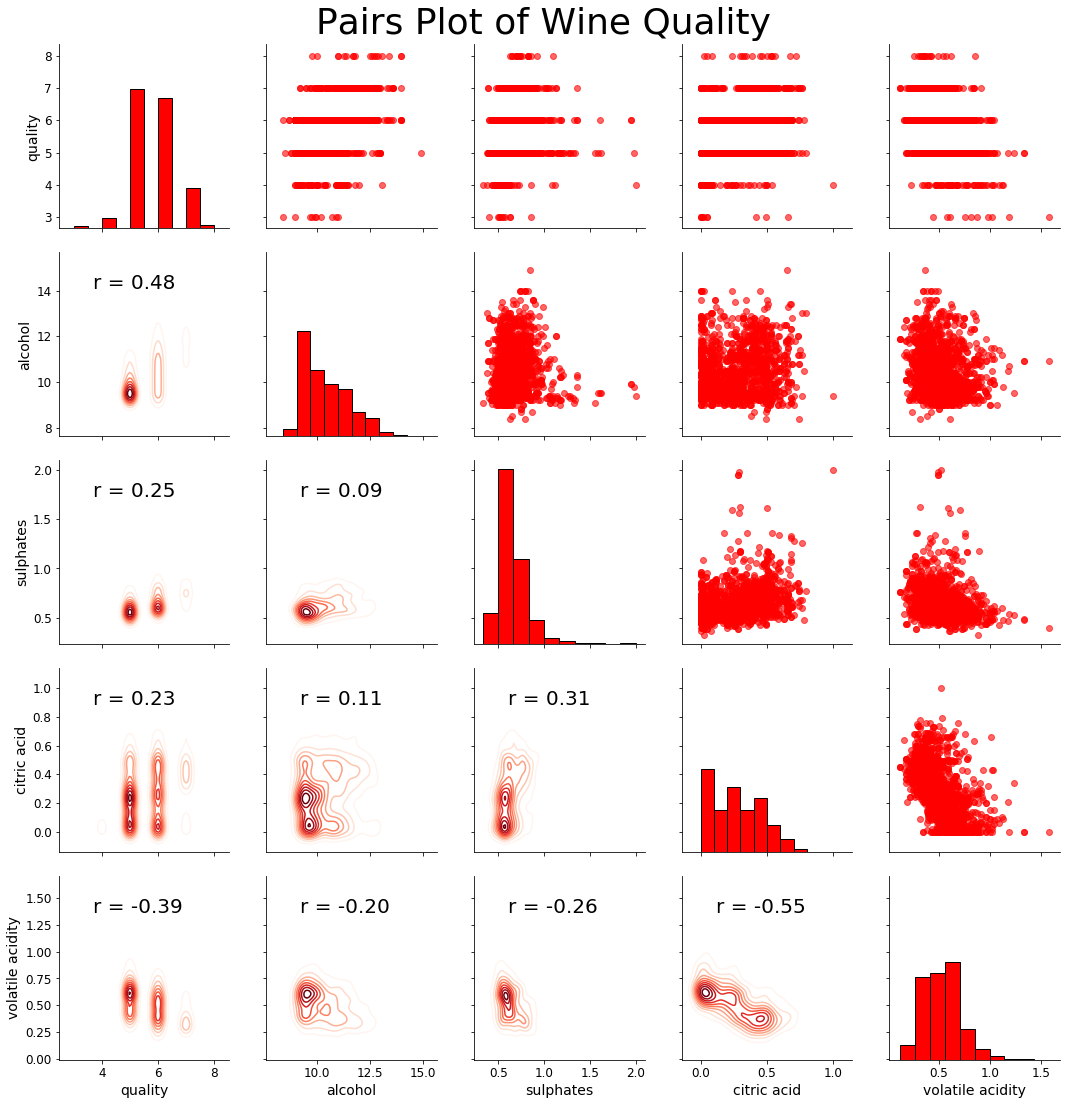

In [23]:
import seaborn as sns
# Extract the columns to  plot
plot_data = data_wine[['quality', 'alcohol', 'sulphates', 'citric acid', 'volatile acidity']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})


# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Wine Quality', size = 36, y = 1.02)

Полученная диаграмма позволяет оценить статистическую связь между атрибутами.

In [25]:
wine1 = wine.drop("quality", axis=1)
wine_labels = wine["quality"].copy()

Применим pipeline для числовых данных

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([

        ('std_scaler', StandardScaler())
])

In [27]:
wine_prepared = num_pipeline.fit_transform(wine1)

In [28]:
wine_prepared

array([[-0.53695574,  1.17721179, -1.05127222, ..., -1.03808527,
        -0.4104349 , -0.28493188],
       [-0.70927919, -1.0216657 ,  0.03086171, ..., -1.03808527,
        -0.97354766, -0.28493188],
       [-0.99648493,  0.29766079, -1.41198353, ...,  0.11259381,
         0.90349489, -0.28493188],
       ...,
       [ 1.07139646, -1.57138507,  1.11299563, ..., -0.29014387,
        -0.03502639, -0.28493188],
       [ 2.56486635, -1.24155345,  2.40125031, ...,  0.6303994 ,
         0.34038212,  1.57439402],
       [-0.42207344,  2.05676278, -1.10280241, ..., -0.57781364,
        -0.59813915, -0.28493188]])

In [29]:
wine_prepared.shape

(1279, 12)

# Обучение модели

Обучим модель с помощью классификатора SGDClassifier

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(wine_prepared, wine_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=-inf, verbose=0, warm_start=False)

Используя cross-validation получим оценку прогнозов.

In [31]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(sgd_clf, wine_prepared, wine_labels, cv=8)
svm_scores.mean()

0.5110640553605709

Оценка прогнозов составила 51% - достаточно низкая.

Используем еще одну меру оценки - матрица неточностей. Для ее построения необходимо иметь прогнозы, т.к. выработать прогнозы на тестовом наборе мы пока не можем, используем функцию cross_val_predict(), которая выполняет перекрестную проверку по K блокам и возвращает прогнозы, выработанные на каждом испытательном блоке. 

In [32]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, wine_prepared, wine_labels, cv=8)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(wine_labels, y_train_pred)

array([[  1,   1,   4,   3,   0,   0],
       [  3,   3,  21,  11,   3,   0],
       [  6,  27, 377, 110,  31,   0],
       [  0,  19, 200, 209,  73,   1],
       [  0,   5,  27,  66,  64,   0],
       [  0,   0,   3,   5,   6,   0]], dtype=int64)

Каждая строка в матрице неточностей представляет фактический класс, а каждый столбец - спрогнозированный класс. Таким образом можно отметить, что максимальное колличество ошибок было допущено при прогнозировании quality 5 и 6. Безупречный классификатор должен иметь матрицу неточностей, содержащую ненулевые значения только на главной диагонали.

Обучим модель SVC

In [52]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(wine_prepared, wine_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, wine_prepared, wine_labels, cv=8)
svm_scores.mean()

0.6271193097622283

In [56]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, wine_prepared, wine_labels, cv=8)

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(wine_labels, y_train_pred)

array([[  0,   0,   8,   1,   0,   0],
       [  0,   0,  29,  11,   1,   0],
       [  0,   0, 435, 115,   1,   0],
       [  0,   0, 159, 316,  27,   0],
       [  0,   0,  12,  99,  51,   0],
       [  0,   0,   0,  11,   3,   0]], dtype=int64)

Модель SVM выглядит немного лучше, но прогнозы остаются неточными.

Обучим модель RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(wine_prepared, wine_labels)

forest_scores = cross_val_score(forest_clf, wine_prepared, wine_labels, cv=8)
forest_scores.mean()

0.6794048929661594

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(forest_clf, wine_prepared, wine_labels, cv=8)
confusion_matrix(wine_labels, y_train_pred)

array([[  0,   1,   7,   1,   0,   0],
       [  1,   0,  25,  14,   1,   0],
       [  0,   0, 441, 109,   1,   0],
       [  0,   0, 125, 347,  30,   0],
       [  0,   0,  10,  71,  79,   2],
       [  0,   0,   0,   7,   5,   2]], dtype=int64)

In [70]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(wine_prepared, wine_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
tree_scores = cross_val_score(tree_clf, wine_prepared, wine_labels, cv=8)
tree_scores.mean()

0.6012312514518794

# Точная настройка модели

Оценим все возможные комбинации гиперпараметров RandomForestClassifier с помощью GridSearchCV.

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [70, 100, 120, 200], 'max_features': [6, 8, 10, 12]},
    {'bootstrap': [False], 'n_estimators': [100, 120], 'max_features': [8, 10, 12]},
  ]

forest_reg = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(wine_prepared, wine_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [70, 100, 120, 200], 'max_features': [6, 8, 10, 12]}, {'bootstrap': [False], 'n_estimators': [100, 120], 'max_features': [8, 10, 12]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [87]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 120}

In [88]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.8161773251654029 {'max_features': 6, 'n_estimators': 70}
0.8152188077176622 {'max_features': 6, 'n_estimators': 100}
0.8171347182513399 {'max_features': 6, 'n_estimators': 120}
0.820000190697741 {'max_features': 6, 'n_estimators': 200}
0.8171347182513399 {'max_features': 8, 'n_estimators': 70}
0.8190461471045368 {'max_features': 8, 'n_estimators': 100}
0.8185687083305921 {'max_features': 8, 'n_estimators': 120}
0.8176129943931109 {'max_features': 8, 'n_estimators': 200}
0.8118550847627916 {'max_features': 10, 'n_estimators': 70}
0.8161773251654029 {'max_features': 10, 'n_estimators': 100}
0.8180909909229178 {'max_features': 10, 'n_estimators': 120}
0.8180909909229178 {'max_features': 10, 'n_estimators': 200}
0.8156982072343786 {'max_features': 12, 'n_estimators': 70}
0.8233306374390175 {'max_features': 12, 'n_estimators': 100}
0.8257013035532893 {'max_features': 12, 'n_estimators': 120}
0.820476796486716 {'max_features': 12, 'n_estimators': 200}
0.8137789146754106 {'bootstrap': False

In [53]:
#pd.DataFrame(grid_search.cv_results_)

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=12),
    }

forest_reg = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(wine_prepared, wine_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000012399908>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000012399BE0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [96]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.8132983838306312 {'max_features': 7, 'n_estimators': 180}
0.8185687083305921 {'max_features': 11, 'n_estimators': 72}
0.8214291784631521 {'max_features': 5, 'n_estimators': 103}
0.8123364693795126 {'max_features': 10, 'n_estimators': 75}
0.8185687083305921 {'max_features': 11, 'n_estimators': 88}
0.820000190697741 {'max_features': 5, 'n_estimators': 100}
0.820000190697741 {'max_features': 8, 'n_estimators': 152}
0.8228556846233527 {'max_features': 3, 'n_estimators': 150}
0.7344957262319571 {'max_features': 5, 'n_estimators': 2}
0.8171347182513399 {'max_features': 8, 'n_estimators': 158}


In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06212443, 0.1064288 , 0.06574273, 0.07163307, 0.0780509 ,
       0.06261465, 0.10598346, 0.07049671, 0.07256945, 0.11108068,
       0.18864613, 0.00462899])

In [98]:
attributes = list(wine1)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.18864613157097965, 'alcohol'),
 (0.11108067523455148, 'sulphates'),
 (0.10642879698988245, 'volatile acidity'),
 (0.10598346349422556, 'total sulfur dioxide'),
 (0.07805089748185647, 'chlorides'),
 (0.07256945337328577, 'pH'),
 (0.07163306855784522, 'residual sugar'),
 (0.07049670963561191, 'density'),
 (0.06574273162535163, 'citric acid'),
 (0.06261465337759285, 'free sulfur dioxide'),
 (0.062124427650572224, 'fixed acidity'),
 (0.00462899100824485, 'density_cat')]

In [100]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("quality", axis=1)
y_test = strat_test_set["quality"].copy()

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)


from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, final_predictions)


array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  8,  2,  2,  0],
       [ 0,  0, 89, 34,  7,  0],
       [ 0,  0, 30, 70, 36,  0],
       [ 0,  0,  4, 16, 16,  1],
       [ 0,  0,  0,  4,  0,  0]], dtype=int64)